# IMPORT LIBRARY

In [ ]:
import pandas as pd
import numpy as np
import warnings

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
from matplotlib import pyplot

# data preprocessing
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# model building
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

# model evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# ignore warning
warnings.filterwarnings('ignore')

# IMPORT DATA

In [ ]:
# import data from drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read data

df = pd.read_excel('/content/drive/MyDrive/Data Gagal Ginjal/DATA JUMLAH PASIEN GAGAL GINJAL RAWAT INAP.xlsx')
df.head()

,NOMR,NOBILLING,KELURAHAN,KECAMATAN,KABUPATEN,KOTA,JNSKELAMIN,SUKU,PERKAWINAN,BANGSA,...,DIAGMATI3,ICOPIMOPR1,DIAGOPR1,ICOPIMOPR2,DIAGOPR2,ICDMORPO,DIAGMORPO,NMDOKRAWAT,NMDOKOPR,RUANGPUL
0,10962361,1841034,PURWANTORO,BLIMBING,NaN,MALANG,PRIA,JAWA,KAWIN,INDONESIA,...,-,39.95,Hemodialysis,38.95,Venous catheterization for renal dialysis,-,-,"dr.HERWINDO PUDJO BRAHMANTYO,Sp.PD","dr.HERWINDO PUDJO BRAHMANTYO,Sp.PD",R 27.3 / IRNA I
1,11398296,1841482,NGRENDENG,SELOREJO,BLITAR,NaN,WANITA,JAWA,KAWIN,INDONESIA,...,-,39.95,Hemodialysis,38.95,Venous catheterization for renal dialysis,-,-,"dr.WIDODO MARDI SANTOSO,Sp.S","dr.WIDODO MARDI SANTOSO,Sp.S",R. MELATI-VIP
2,11275382,1841641,NaN,SBR PUCUNG,MALANG,NaN,WANITA,JAWA,KAWIN,INDONESIA,...,PNEUMONIA,38.95,Venous catheterization for renal dialysis,39.95,Hemodialysis,-,-,"dr.ATMA GUNAWAN,Sp.PD","dr.ATMA GUNAWAN,Sp.PD",R 26.2 / IW IRNA I
3,11409540,1841681,KOTALAMA,KEDUNGKANDANG,NaN,MALANG,PRIA,JAWA,KAWIN,INDONESIA,...,-,39.95,Hemodialysis,-,-,-,-,"dr.NUR SAMSU,Sp.PD-KGH","dr.NUR SAMSU,Sp.PD-KGH",R 27.3 / IRNA I
4,11420115,1842014,KEPUHARJO,KARANGPLOSO,MALANG,NaN,PRIA,JAWA,KAWIN,INDONESIA,...,-,99.29,Injection or infusion of other therapeutic or ...,-,-,-,-,"dr.SETYO SUGIHARTO,Sp.B.KBD","dr.SETYO SUGIHARTO,Sp.B.KBD",R 21.1 / MATA/THT/IRNA II


# COLUMN CHECK

In [ ]:
# show information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   NOMR        640 non-null    int64         
 1   NOBILLING   640 non-null    int64         
 2   KELURAHAN   638 non-null    object        
 3   KECAMATAN   640 non-null    object        
 4   KABUPATEN   380 non-null    object        
 5   KOTA        267 non-null    object        
 6   JNSKELAMIN  640 non-null    object        
 7   SUKU        639 non-null    object        
 8   PERKAWINAN  640 non-null    object        
 9   BANGSA      640 non-null    object        
 10  AGAMA       640 non-null    object        
 11  PENDIDIKAN  640 non-null    object        
 12  PEKERJAAN   640 non-null    object        
 13  UMURTAHUN   640 non-null    int64         
 14  UMURBULAN   640 non-null    int64         
 15  UMURHARI    640 non-null    int64         
 16  TGLLAHIR    640 non-null  

# COLUMN ASSIGN

In [ ]:
# assign column

df = df[['JNSKELAMIN','UMURTAHUN','DIAGMASUK','LAMADIRAWA','DIAGUTAMA','DIAGKOMPL','DIAGOPR1','PULANGMATI']]
df.head()

,JNSKELAMIN,UMURTAHUN,DIAGMASUK,LAMADIRAWA,DIAGUTAMA,DIAGKOMPL,DIAGOPR1,PULANGMATI
0,PRIA,85,AAL IMPLATY DIARE ...DEHIDRASI,13,"Chronic Kidney Disease, stage 5",Malignant neoplasm of prostate/ Ca prostat,Hemodialysis,TIDAK
1,WANITA,76,HIPERTENSI + DM,10,"CRF / Chronic Renal Failure, Unspecified",DIABETES MELITUS YTT / COMA DIABETICUM,Hemodialysis,TIDAK
2,WANITA,70,CKD ST5 + NOUSE VOMITTING,24,"Chronic Kidney Disease, stage 5",SHOCK HYPOVOLEMIK,Venous catheterization for renal dialysis,YA
3,PRIA,55,DOC+CKD ST 5,8,"Chronic Kidney Disease, stage 5",HIPOGLIKEMIA/HYPOGLIKEMIA,Hemodialysis,YA
4,PRIA,55,ABDOMINAL PAIN + CKD,5,"CRF / Chronic Renal Failure, Unspecified",pain localized to upper abdomen,Injection or infusion of other therapeutic or ...,TIDAK


In [ ]:
# rename column

df.columns = ['JENIS_KELAMIN','UMUR','DIAGNOSA_MASUK','LAMA_RAWAT','DIAGNOSA_UTAMA',
              'KOMPLIKASI','HEMODIALISIS','MENINGGAL']
df.head()

,JENIS_KELAMIN,UMUR,DIAGNOSA_MASUK,LAMA_RAWAT,DIAGNOSA_UTAMA,KOMPLIKASI,HEMODIALISIS,MENINGGAL
0,PRIA,85,AAL IMPLATY DIARE ...DEHIDRASI,13,"Chronic Kidney Disease, stage 5",Malignant neoplasm of prostate/ Ca prostat,Hemodialysis,TIDAK
1,WANITA,76,HIPERTENSI + DM,10,"CRF / Chronic Renal Failure, Unspecified",DIABETES MELITUS YTT / COMA DIABETICUM,Hemodialysis,TIDAK
2,WANITA,70,CKD ST5 + NOUSE VOMITTING,24,"Chronic Kidney Disease, stage 5",SHOCK HYPOVOLEMIK,Venous catheterization for renal dialysis,YA
3,PRIA,55,DOC+CKD ST 5,8,"Chronic Kidney Disease, stage 5",HIPOGLIKEMIA/HYPOGLIKEMIA,Hemodialysis,YA
4,PRIA,55,ABDOMINAL PAIN + CKD,5,"CRF / Chronic Renal Failure, Unspecified",pain localized to upper abdomen,Injection or infusion of other therapeutic or ...,TIDAK


# MISSING VALUE CHECK

In [ ]:
# missing values check

missing_values = df.isnull().sum()
print("Jumlah missing values di setiap kolom:")
print(missing_values)

Jumlah missing values di setiap kolom:
JENIS_KELAMIN     0
UMUR              0
DIAGNOSA_MASUK    1
LAMA_RAWAT        0
DIAGNOSA_UTAMA    0
KOMPLIKASI        0
HEMODIALISIS      0
MENINGGAL         0
dtype: int64


# DUPLICATE DATA CHECK

In [ ]:
# duplicate data check

df.duplicated().sum()

1

In [ ]:
# drop duplicated

df.drop_duplicates(inplace=True)

In [ ]:
# duplicate data check

df.duplicated().sum()

0

# VALUE ERROR CHECK

In [ ]:
# check error values

for idx, row in df.iterrows():
    if not isinstance(row['JENIS_KELAMIN'], str):
        df.at[idx, 'JENIS_KELAMIN'] = np.nan

for idx, row in df.iterrows():
    try:
        df.at[idx, 'UMUR'] = int(row['UMUR'])
    except (ValueError, TypeError):
        df.at[idx, 'UMUR'] = np.nan

for idx, row in df.iterrows():
    if not isinstance(row['DIAGNOSA_MASUK'], str):
        df.at[idx, 'DIAGNOSA_MASUK'] = np.nan

for idx, row in df.iterrows():
    try:
        df.at[idx, 'LAMA_RAWAT'] = int(row['LAMA_RAWAT'])
    except (ValueError, TypeError):
        df.at[idx, 'LAMA_RAWAT'] = np.nan

for idx, row in df.iterrows():
    if not isinstance(row['DIAGNOSA_UTAMA'], str):
        df.at[idx, 'DIAGNOSA_UTAMA'] = np.nan

for idx, row in df.iterrows():
    if not isinstance(row['KOMPLIKASI'], str):
        df.at[idx, 'KOMPLIKASI'] = np.nan

for idx, row in df.iterrows():
    if not isinstance(row['HEMODIALISIS'], str):
        df.at[idx, 'HEMODIALISIS'] = np.nan

for idx, row in df.iterrows():
    if not isinstance(row['MENINGGAL'], str):
        df.at[idx, 'MENINGGAL'] = np.nan

In [ ]:
# missing values check

missing_values = df.isnull().sum()
print("Jumlah missing values di setiap kolom:")
print(missing_values)

Jumlah missing values di setiap kolom:
JENIS_KELAMIN     0
UMUR              0
DIAGNOSA_MASUK    1
LAMA_RAWAT        0
DIAGNOSA_UTAMA    0
KOMPLIKASI        0
HEMODIALISIS      0
MENINGGAL         0
dtype: int64


In [ ]:
# drop missing value

df.dropna(inplace=True)

In [ ]:
# missing values check

missing_values = df.isnull().sum()
print("Jumlah missing values di setiap kolom:")
print(missing_values)

Jumlah missing values di setiap kolom:
JENIS_KELAMIN     0
UMUR              0
DIAGNOSA_MASUK    0
LAMA_RAWAT        0
DIAGNOSA_UTAMA    0
KOMPLIKASI        0
HEMODIALISIS      0
MENINGGAL         0
dtype: int64


# DATA LABELING

Baris yang mengandung kata CKD, CKD ST 5, dan CKD STAGE 5 akan didefinisikan sebagai `True`, sisanya sebagai `False`.

In [ ]:
diag_masuk = df['DIAGNOSA_MASUK'].str.contains('CKD|CKD ST 5|CKD STAGE 5') # mengambil kolom yg mengandung kata CKD, CKD ST 5, dan CKD STAGE 5
diag_masuk.head()

# true : mengandung kata CKD
# false : tidak mengandung kata CKD

,DIAGNOSA_MASUK
0,False
1,False
2,True
3,True
4,True


In [ ]:
diag = pd.DataFrame(diag_masuk)
diag.head()

,DIAGNOSA_MASUK
0,False
1,False
2,True
3,True
4,True


Value `False` pada kolom DIAGNOSA_MASUK akan dikode dengan 0

Value `True` pada kolom DIAGNOSA_MASUK akan dikode dengan 1

In [ ]:
# add on prev df

df['DIAGNOSA_MASUK'] = diag['DIAGNOSA_MASUK'].astype(int)
df.head()

,JENIS_KELAMIN,UMUR,DIAGNOSA_MASUK,LAMA_RAWAT,DIAGNOSA_UTAMA,KOMPLIKASI,HEMODIALISIS,MENINGGAL
0,PRIA,85,0,13,"Chronic Kidney Disease, stage 5",Malignant neoplasm of prostate/ Ca prostat,Hemodialysis,TIDAK
1,WANITA,76,0,10,"CRF / Chronic Renal Failure, Unspecified",DIABETES MELITUS YTT / COMA DIABETICUM,Hemodialysis,TIDAK
2,WANITA,70,1,24,"Chronic Kidney Disease, stage 5",SHOCK HYPOVOLEMIK,Venous catheterization for renal dialysis,YA
3,PRIA,55,1,8,"Chronic Kidney Disease, stage 5",HIPOGLIKEMIA/HYPOGLIKEMIA,Hemodialysis,YA
4,PRIA,55,1,5,"CRF / Chronic Renal Failure, Unspecified",pain localized to upper abdomen,Injection or infusion of other therapeutic or ...,TIDAK


Baris yang mengandung kata ANEMIA akan didefinisikan sebagai `True`, sisanya sebagai `False`.

In [ ]:
komplikasi_1 = df['KOMPLIKASI'].str.contains('ANEMIA') # mengambil kolom yg mengandung kata ANEMIA
komplikasi_1.head()

# true : mengandung kata anemia
# false : tidak mengandung kata anemia

,KOMPLIKASI
0,False
1,False
2,False
3,False
4,False


Value `False` pada kolom KOMPLIKASI akan dikode dengan 0

Value `True` pada kolom KOMPLIKASI akan dikode dengan 1

In [ ]:
komplikasi_anemia = pd.DataFrame(komplikasi_1)
komplikasi_anemia.head()

,KOMPLIKASI
0,False
1,False
2,False
3,False
4,False


In [ ]:
# add on prev df

df['KOMPLIKASI_ANEMIA'] = komplikasi_anemia['KOMPLIKASI'].astype(int)
df.head()

,JENIS_KELAMIN,UMUR,DIAGNOSA_MASUK,LAMA_RAWAT,DIAGNOSA_UTAMA,KOMPLIKASI,HEMODIALISIS,MENINGGAL,KOMPLIKASI_ANEMIA
0,PRIA,85,0,13,"Chronic Kidney Disease, stage 5",Malignant neoplasm of prostate/ Ca prostat,Hemodialysis,TIDAK,0
1,WANITA,76,0,10,"CRF / Chronic Renal Failure, Unspecified",DIABETES MELITUS YTT / COMA DIABETICUM,Hemodialysis,TIDAK,0
2,WANITA,70,1,24,"Chronic Kidney Disease, stage 5",SHOCK HYPOVOLEMIK,Venous catheterization for renal dialysis,YA,0
3,PRIA,55,1,8,"Chronic Kidney Disease, stage 5",HIPOGLIKEMIA/HYPOGLIKEMIA,Hemodialysis,YA,0
4,PRIA,55,1,5,"CRF / Chronic Renal Failure, Unspecified",pain localized to upper abdomen,Injection or infusion of other therapeutic or ...,TIDAK,0


Baris yang mengandung kata DM atau DIABETES akan didefinisikan sebagai `True`, sisanya sebagai `False`.

In [ ]:
komplikasi_2 = df['KOMPLIKASI'].str.contains('DM | DIABETES') # mengambil kolom yg mengandung kata DIABETES
komplikasi_2.head()

# true : mengandung kata diabetes
# false : tidak mengandung kata diabetes

,KOMPLIKASI
0,False
1,False
2,False
3,False
4,False


Value `False` pada kolom KOMPLIKASI akan dikode dengan 0

Value `True` pada kolom KOMPLIKASI akan dikode dengan 1

In [ ]:
komplikasi_diabetes = pd.DataFrame(komplikasi_2)
komplikasi_diabetes.head()

,KOMPLIKASI
0,False
1,False
2,False
3,False
4,False


In [ ]:
# add on prev df

df['KOMPLIKASI_DIABETES'] = komplikasi_diabetes['KOMPLIKASI'].astype(int)
df.head()

,JENIS_KELAMIN,UMUR,DIAGNOSA_MASUK,LAMA_RAWAT,DIAGNOSA_UTAMA,KOMPLIKASI,HEMODIALISIS,MENINGGAL,KOMPLIKASI_ANEMIA,KOMPLIKASI_DIABETES
0,PRIA,85,0,13,"Chronic Kidney Disease, stage 5",Malignant neoplasm of prostate/ Ca prostat,Hemodialysis,TIDAK,0,0
1,WANITA,76,0,10,"CRF / Chronic Renal Failure, Unspecified",DIABETES MELITUS YTT / COMA DIABETICUM,Hemodialysis,TIDAK,0,0
2,WANITA,70,1,24,"Chronic Kidney Disease, stage 5",SHOCK HYPOVOLEMIK,Venous catheterization for renal dialysis,YA,0,0
3,PRIA,55,1,8,"Chronic Kidney Disease, stage 5",HIPOGLIKEMIA/HYPOGLIKEMIA,Hemodialysis,YA,0,0
4,PRIA,55,1,5,"CRF / Chronic Renal Failure, Unspecified",pain localized to upper abdomen,Injection or infusion of other therapeutic or ...,TIDAK,0,0


Label jenis kelamin
- Pria: 1
- Wanita: 0


In [ ]:
# label data JENIS_KELAMIN

def label_sample_1(value):
    if value == 'PRIA':
      return 1
    else:
      return 0

df['JENIS_KELAMIN'] = df['JENIS_KELAMIN'].apply(label_sample_1)

Label diagnosa utama
- Chronic Renal Failure/CFR: 0
- Chronic Kidney Disease, stage 5 atau End stage renal disease: 1
- Lainnya: 2


In [ ]:
# label data DIAGNOSA_UTAMA

def label_sample_2(value):
    if value == 'Chronic Kidney Disease, stage 5':
      return 1
    if value == 'End stage renal disease':
      return 1
    elif value == 'CRF / Chronic Renal Failure, Unspecified':
      return 0
    else:
      return 2

df['DIAGNOSA_UTAMA'] = df['DIAGNOSA_UTAMA'].apply(label_sample_2)

Label Riwayat Hemodialisis
- Hemodialisis: 1
- Tidak Hemodialisis: 0

In [ ]:
# label data HEMODIALISIS

def label_sample_3(value):
    if value == 'Hemodialysis':
        return 1
    else:
        return 0

df['HEMODIALISIS'] = df['HEMODIALISIS'].apply(label_sample_3)

Label Pasien Meninggal

- Meninggal: 1
- Tidak Meninggal: 0

In [ ]:
# label data MENINGGAL

def label_sample_4(value):
    if value == 'TIDAK':
        return 0
    else:
        return 1

df['MENINGGAL'] = df['MENINGGAL'].apply(label_sample_4)

In [ ]:
# check value counts

print(df['DIAGNOSA_MASUK'].value_counts(),'\n')
print(df['DIAGNOSA_UTAMA'].value_counts(),'\n')
print(df['KOMPLIKASI_ANEMIA'].value_counts(),'\n')
print(df['KOMPLIKASI_DIABETES'].value_counts(),'\n')
print(df['HEMODIALISIS'].value_counts(),'\n')
print(df['MENINGGAL'].value_counts())

DIAGNOSA_MASUK
1    531
0    107
Name: count, dtype: int64 

DIAGNOSA_UTAMA
1    570
0     60
2      8
Name: count, dtype: int64 

KOMPLIKASI_ANEMIA
0    532
1    106
Name: count, dtype: int64 

KOMPLIKASI_DIABETES
0    588
1     50
Name: count, dtype: int64 

HEMODIALISIS
0    359
1    279
Name: count, dtype: int64 

MENINGGAL
0    521
1    117
Name: count, dtype: int64


In [ ]:
# df check

df.head()

,JENIS_KELAMIN,UMUR,DIAGNOSA_MASUK,LAMA_RAWAT,DIAGNOSA_UTAMA,KOMPLIKASI,HEMODIALISIS,MENINGGAL,KOMPLIKASI_ANEMIA,KOMPLIKASI_DIABETES
0,1,85,0,13,1,Malignant neoplasm of prostate/ Ca prostat,1,0,0,0
1,0,76,0,10,0,DIABETES MELITUS YTT / COMA DIABETICUM,1,0,0,0
2,0,70,1,24,1,SHOCK HYPOVOLEMIK,0,1,0,0
3,1,55,1,8,1,HIPOGLIKEMIA/HYPOGLIKEMIA,1,1,0,0
4,1,55,1,5,0,pain localized to upper abdomen,0,0,0,0


In [ ]:
# drop unused column

df.drop(columns='KOMPLIKASI', axis=1, inplace=True)

# EDA

In [ ]:
# descriptive

desc = df[['UMUR','LAMA_RAWAT']]
desc.describe()

,UMUR,LAMA_RAWAT
count,638.000000,638.000000
mean,52.199060,4.550157
std,16.343147,4.110693
min,7.000000,1.000000
25%,43.000000,2.000000
50%,54.000000,3.000000
75%,63.000000,6.000000
max,95.000000,27.000000


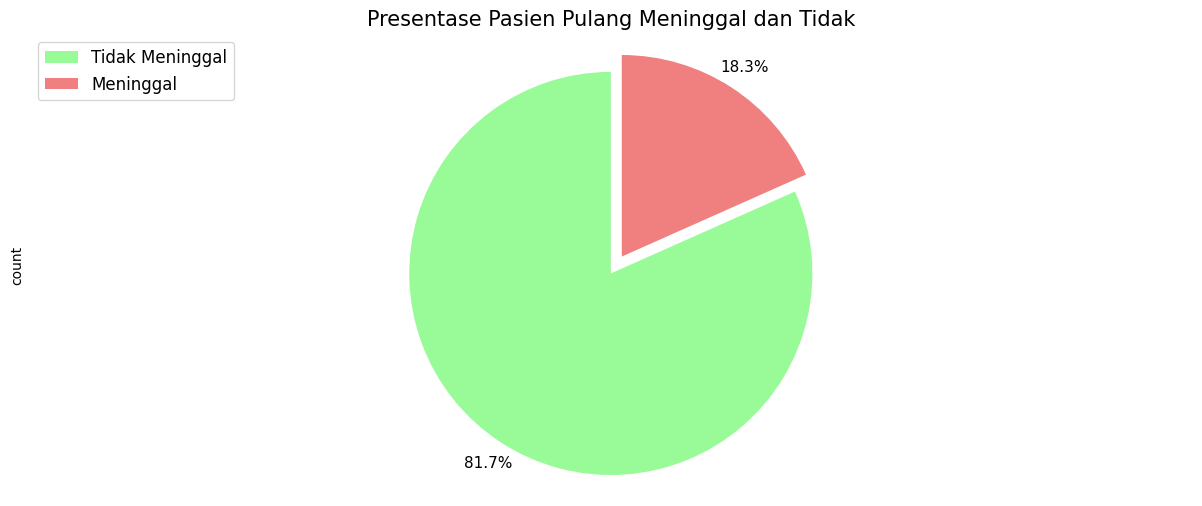

In [ ]:
# pie chart PASIEN_MENINGGAL

color_list = ['palegreen','lightcoral']
df_meninggal = df['MENINGGAL'].value_counts()
label_1 = ['Tidak Meninggal','Meninggal']
df_meninggal.plot(kind='pie',
                  figsize=(15,6),
                  autopct='%1.1f%%',
                  pctdistance=1.12,
                  startangle=90,
                  shadow=False,
                  labels=None,
                  explode=[0,0.1],
                  colors=color_list,
                  textprops={'fontsize': 11}
                  ) # wedgeprops={'edgecolor': 'black'} : untuk menambahkan garis tepi
plt.legend(labels=label_1, loc='upper left', fontsize=12)
plt.axis('equal')
plt.title('Presentase Pasien Pulang Meninggal dan Tidak', fontsize=15)
plt.show()

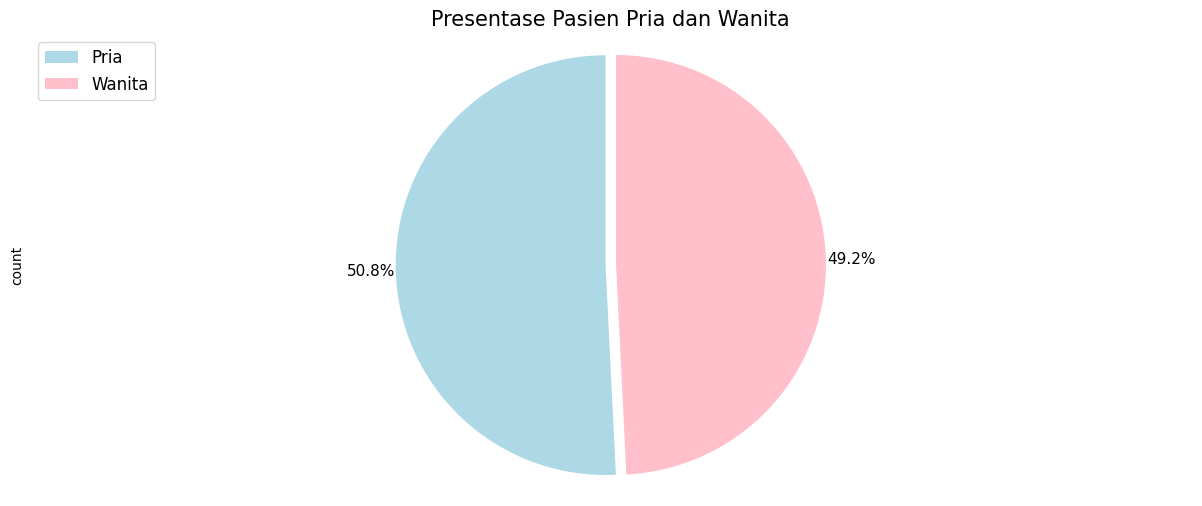

In [ ]:
# pie chart JENIS_KELAMIN

color_list_2 = ['lightblue','pink']
df_jenis_kelamin = df['JENIS_KELAMIN'].value_counts()
label_2 = ['Pria','Wanita']
df_jenis_kelamin.plot(kind='pie',
                  figsize=(15,6),
                  autopct='%1.1f%%',
                  pctdistance=1.12,
                  startangle=90,
                  shadow=False,
                  labels=None,
                  explode=[0,0.05],
                  colors=color_list_2,
                  textprops={'fontsize': 11}
                  )
plt.legend(labels=label_2, loc='upper left', fontsize=12)
plt.axis('equal')
plt.title('Presentase Pasien Pria dan Wanita', fontsize=15)
plt.show()

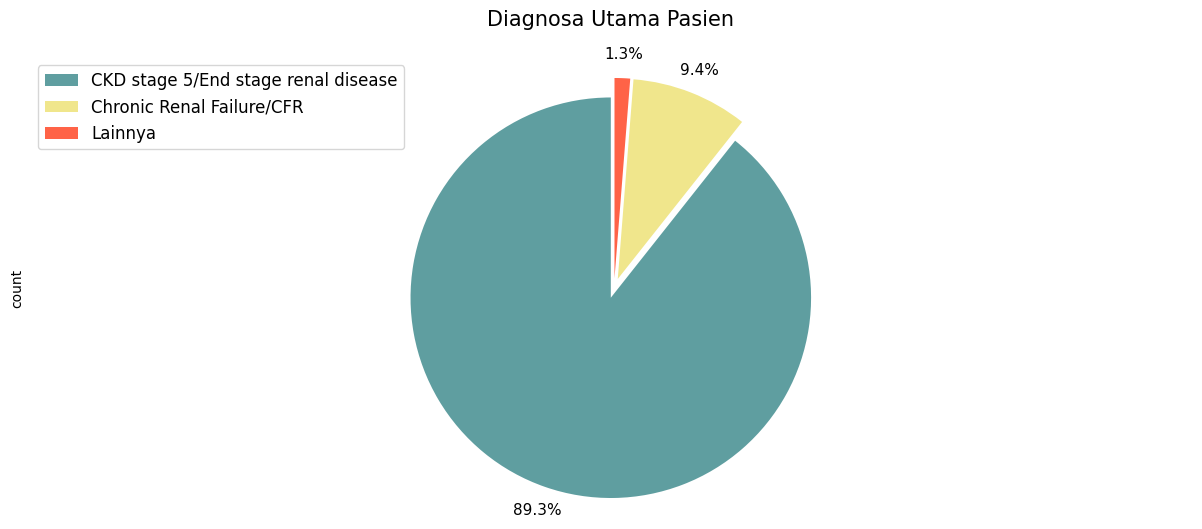

In [ ]:
# pie chart DIAGNOSA_UTAMA

color_list_3 = ['cadetblue','khaki','tomato']
df_diagnosa = df['DIAGNOSA_UTAMA'].value_counts()
label_3 = ['CKD stage 5/End stage renal disease','Chronic Renal Failure/CFR',
           'Lainnya']
df_diagnosa.plot(kind='pie',
                 figsize=(15,6),
                 autopct='%1.1f%%',
                 pctdistance=1.12,
                 startangle=90,
                 shadow=False,
                 labels=None,
                 explode=[0.05,0.05, 0.05],
                 colors=color_list_3,
                 textprops={'fontsize': 11}
                  )
plt.legend(labels=label_3, loc='upper left', fontsize=12)
plt.axis('equal')
plt.title('Diagnosa Utama Pasien', fontsize=15, y=1.05)
plt.show()

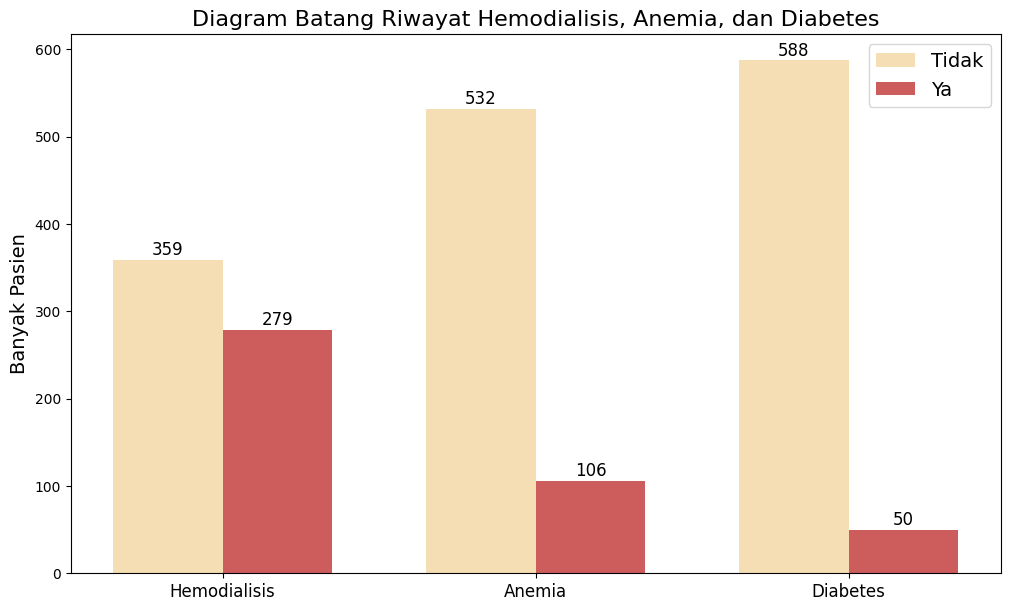

In [ ]:
# bar chart RIWAYAT HEMODIALISIS, ANEMIA, dan DIABETES

df_hemodialisis = df['HEMODIALISIS'].value_counts()
df_anemia = df['KOMPLIKASI_ANEMIA'].value_counts()
df_diabetes = df['KOMPLIKASI_DIABETES'].value_counts()

riwayat = ['Hemodialisis', 'Anemia', 'Diabetes']

kategori_tidak = [df_hemodialisis.loc[0], df_anemia.loc[0], df_diabetes.loc[0]]
kategori_ya = [df_hemodialisis.loc[1], df_anemia.loc[1], df_diabetes.loc[1]]

x = np.arange (len(riwayat))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))

tidak = ax.bar(x - width/2, kategori_tidak, width, label='Tidak', color='wheat')
ya = ax.bar(x + width/2, kategori_ya, width, label='Ya', color='indianred')

for i in range(len(riwayat)):
    ax.text(x[i] - width/2, kategori_tidak[i] + 0.5, str(kategori_tidak[i]), ha='center', va='bottom', fontsize=12)
    ax.text(x[i] + width/2, kategori_ya[i] + 0.5, str(kategori_ya[i]), ha='center', va='bottom', fontsize=12)

ax.set_title('Diagram Batang Riwayat Hemodialisis, Anemia, dan Diabetes', size=16)
ax.set_ylabel('Banyak Pasien', size=14)
ax.set_xticks(x)
ax.set_xticklabels(riwayat, size=12)
ax.legend(fontsize=14)

plt.show()

# SPLIT DATA

In [ ]:
X = df.drop(columns=['MENINGGAL'], axis=1)
y = df['MENINGGAL']

In [ ]:
# split 80% data train, 20% data test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=921)
print('Training dataset\t:', len(X_train))
print('Testing dataset\t\t:', len(X_test))

Training dataset	: 510
Testing dataset		: 128


In [ ]:
# resampling SMOTE

from imblearn.over_sampling import SMOTE

resampling = SMOTE(random_state=999)
X_train_resampled, y_train_resampled = resampling.fit_resample(X_train, y_train)

In [ ]:
print('Training dataset X\t:', len(X_train_resampled))
print('Testing dataset \t:', len(X_test))

Training dataset X	: 824
Testing dataset 	: 128


# CLASSIFIER

### KNN

In [ ]:
# hyperparameter tuning

knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors':[3, 5, 7, 9, 11, 13],
                  'weights':['uniform', 'distance'],
                  'metric':['euclidean','manhattan']}
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5)
grid_search_knn.fit(X_test, y_test)

print("Best parameters:", grid_search_knn.best_params_)
best_model_knn = grid_search_knn.best_estimator_
accuracy = best_model_knn.score(X_test, y_test)
print("Accuracy:", accuracy)

Best parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Accuracy: 0.8671875


In [ ]:
# build model

model_knn = KNeighborsClassifier(n_neighbors=grid_search_knn.best_params_['n_neighbors'],
                                 weights=grid_search_knn.best_params_['weights'],
                                 metric=grid_search_knn.best_params_['metric'])


Hasil Classification Report KNN
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       109
           1       0.19      0.26      0.22        19

    accuracy                           0.72       128
   macro avg       0.52      0.53      0.52       128
weighted avg       0.76      0.72      0.74       128



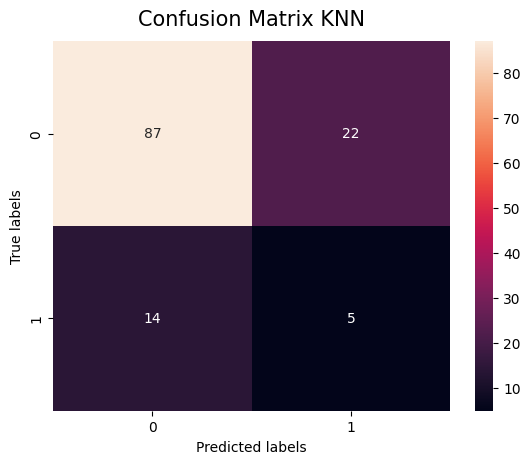

In [ ]:
# fit model

model_knn.fit(X_train_resampled, y_train_resampled)

# predict
y_pred_test_knn = model_knn.predict(X_test)

print('\nHasil Classification Report KNN')
print(classification_report(y_test,y_pred_test_knn))

cm_knn = confusion_matrix(y_test,y_pred_test_knn)

ax= plt.subplot()
sns.heatmap(cm_knn, annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix KNN', y=1.02, fontsize=15);

In [ ]:
print(accuracy_score(y_test, y_pred_test_knn))
print(precision_score(y_test, y_pred_test_knn))

0.71875
0.18518518518518517


### Logistic Regression

In [ ]:
# hyperparameter tuning

lr = LogisticRegression(max_iter=1000, random_state=999)
param_grid_lr = {'C':[0.001, 0.01, 0.1, 1, 10, 100],
                 'penalty':['l1', 'l2', 'elasticnet'],
                 'solver': ['liblinear', 'newton-cholesky', 'saga'],
                 }
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5)
grid_search_lr.fit(X_test, y_test)

print("Best parameters:", grid_search_lr.best_params_)
best_model_lr = grid_search_lr.best_estimator_
accuracy = best_model_lr.score(X_test, y_test)
print("Accuracy:", accuracy)

Best parameters: {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.8515625


In [ ]:
# build model

model_lr = LogisticRegression(C=grid_search_lr.best_params_['C'],
                              penalty=grid_search_lr.best_params_['penalty'],
                              solver= grid_search_lr.best_params_['solver'],
                              random_state=999, max_iter=1000)


Hasil Classification Report Logistic Regression
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       109
           1       0.00      0.00      0.00        19

    accuracy                           0.85       128
   macro avg       0.43      0.50      0.46       128
weighted avg       0.73      0.85      0.78       128



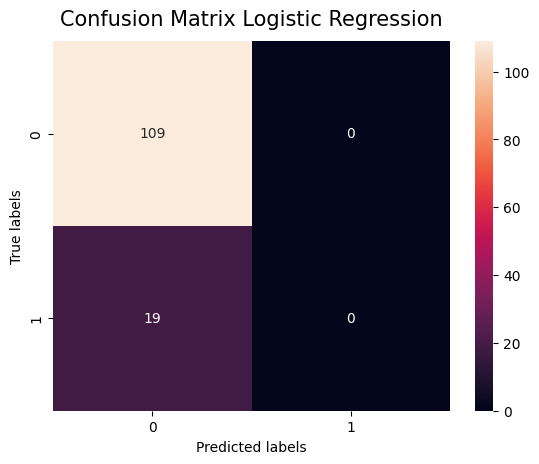

In [ ]:
# fit model

model_lr.fit(X_train_resampled, y_train_resampled)

# predict
y_pred_test_lr = model_lr.predict(X_test)

print('\nHasil Classification Report Logistic Regression')
print(classification_report(y_test,y_pred_test_lr))

cm_lr = confusion_matrix(y_test,y_pred_test_lr)

ax= plt.subplot()
sns.heatmap(cm_lr, annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix Logistic Regression', y=1.02, fontsize=15);

In [ ]:
print(accuracy_score(y_test, y_pred_test_lr))
print(precision_score(y_test, y_pred_test_lr))

0.8515625
0.0


### SVM

In [ ]:
# hyperparameter tuning

svm = SVC(random_state=999)
param_grid_svm = {'C': [0.1, 1, 10, 100],
                  'gamma': ['scale', 'auto'],
                  'kernel': ['linear', 'rbf']}
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5)
grid_search_svm.fit(X_test, y_test)

print("Best parameters:", grid_search_svm.best_params_)
best_model_svm = grid_search_svm.best_estimator_
accuracy = best_model_svm.score(X_test, y_test)
print("Accuracy:", accuracy)

Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.8515625


In [ ]:
# build model

model_svc = SVC(kernel=grid_search_svm.best_params_['kernel'],
                C=grid_search_svm.best_params_['C'],
                gamma=grid_search_svm.best_params_['gamma'],
                probability=True, random_state=999)


Hasil Classification Report SVC
              precision    recall  f1-score   support

           0       0.88      0.64      0.74       109
           1       0.19      0.47      0.27        19

    accuracy                           0.62       128
   macro avg       0.53      0.56      0.50       128
weighted avg       0.77      0.62      0.67       128



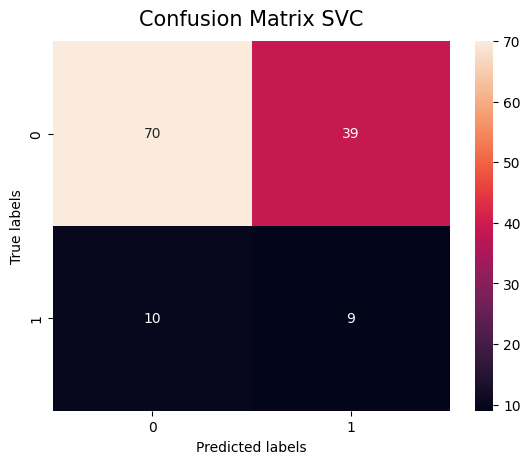

In [ ]:
# fit model

model_svc.fit(X_train_resampled, y_train_resampled)

# predict
y_pred_test_svc = model_svc.predict(X_test)

print('\nHasil Classification Report SVC')
print(classification_report(y_test,y_pred_test_svc))

cm_svc = confusion_matrix(y_test,y_pred_test_svc)

ax= plt.subplot()
sns.heatmap(cm_svc, annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix SVC', y=1.02, fontsize=15);

In [ ]:
print(accuracy_score(y_test, y_pred_test_svc))
print(precision_score(y_test, y_pred_test_svc))

0.6171875
0.1875


In [ ]:
estimator = []
estimator.append(('KNN',model_knn))
estimator.append(('LR', model_lr))
estimator.append(('SVC',model_svc))

## HARD VOTING

In [ ]:
# build model

hard_voting = VotingClassifier(estimators = estimator, voting ='hard')

In [ ]:
# fit model

hard_voting.fit(X_train_resampled, y_train_resampled)

VotingClassifier(estimators=[('KNN',
                              KNeighborsClassifier(metric='euclidean',
                                                   n_neighbors=3)),
                             ('LR',
                              LogisticRegression(C=0.001, max_iter=1000,
                                                 penalty='l1', random_state=999,
                                                 solver='liblinear')),
                             ('SVC',
                              SVC(C=0.1, kernel='linear', probability=True,
                                  random_state=999))])

In [ ]:
# predict

y_pred_test_hard = hard_voting.predict(X_test)

## SOFT VOTING

In [ ]:
# build model

soft_voting = VotingClassifier(estimators = estimator, voting ='soft')

In [ ]:
# fit model

soft_voting.fit(X_train_resampled, y_train_resampled)

VotingClassifier(estimators=[('KNN',
                              KNeighborsClassifier(metric='euclidean',
                                                   n_neighbors=3)),
                             ('LR',
                              LogisticRegression(C=0.001, max_iter=1000,
                                                 penalty='l1', random_state=999,
                                                 solver='liblinear')),
                             ('SVC',
                              SVC(C=0.1, kernel='linear', probability=True,
                                  random_state=999))],
                 voting='soft')

In [ ]:
# predict

y_pred_test_soft = soft_voting.predict(X_test)

# MODEL EVALUATION

## HARD VOTING


Hasil Classification Report Hard Voting
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       109
           1       0.27      0.21      0.24        19

    accuracy                           0.80       128
   macro avg       0.57      0.55      0.56       128
weighted avg       0.78      0.80      0.79       128



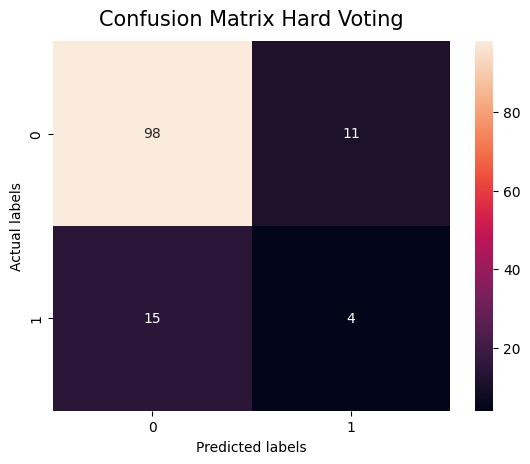

In [ ]:
# classification report and confusion matrix

print('\nHasil Classification Report Hard Voting')
print(classification_report(y_test,y_pred_test_hard))

cm_hard = confusion_matrix(y_test,y_pred_test_hard)

ax= plt.subplot()
sns.heatmap(cm_hard, annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix Hard Voting', y=1.02, fontsize=15)
plt.show()

In [ ]:
# model evaluation

print('Accuracy score data test model Hard Voting adalah :',accuracy_score(y_test, y_pred_test_hard))
print('Precision score data test model Hard Voting adalah :', precision_score(y_test, y_pred_test_hard))
print('Recall score data test model Hard Voting adalah :', recall_score(y_test,y_pred_test_hard))

Accuracy score data test model Hard Voting adalah : 0.796875
Precision score data test model Hard Voting adalah : 0.26666666666666666
Recall score data test model Hard Voting adalah : 0.21052631578947367


## SOFT VOTING


Hasil Classification Report Soft Voting
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       109
           1       0.22      0.32      0.26        19

    accuracy                           0.73       128
   macro avg       0.55      0.56      0.55       128
weighted avg       0.77      0.73      0.75       128



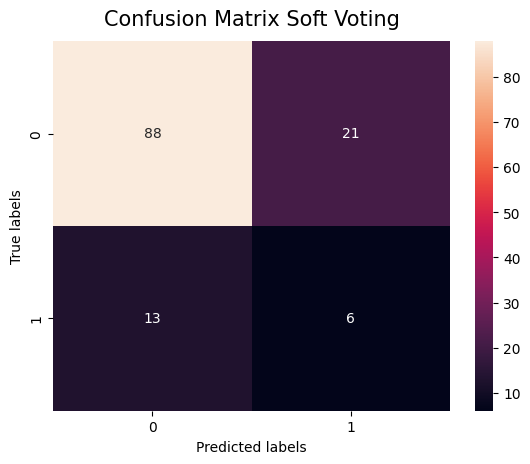

In [ ]:
# classification report and confusion matrix

print('\nHasil Classification Report Soft Voting')
print(classification_report(y_test,y_pred_test_soft))

cm_soft = confusion_matrix(y_test,y_pred_test_soft)

ax= plt.subplot()
sns.heatmap(cm_soft, annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix Soft Voting', y=1.02, fontsize=15)
plt.show()

In [ ]:
# model evaluation

print('Accuracy score data test model Soft Voting adalah :',accuracy_score(y_test, y_pred_test_soft))
print('Precision score data test model Soft Voting adalah :', precision_score(y_test, y_pred_test_soft))
print('Recall score data test model Soft Voting adalah :', recall_score(y_test,y_pred_test_soft))

Accuracy score data test model Soft Voting adalah : 0.734375
Precision score data test model Soft Voting adalah : 0.2222222222222222
Recall score data test model Soft Voting adalah : 0.3157894736842105
